# Credentials

# Part 1 - Web Scraping

Explain your project idea:

In the summer of 2022, the US economy has experienced 2 consecutives quarters of negative GDP growth. According to the definition of a recession, generally 2 negative quarters in GDP usually means the US economy is in a recession. However, with employment and consumer staying strong, many economists do not believe we are in a recession. 

This project aims to do a deep dive in the US economy. 

We will look at:
1) Real GDP = measures the value of finish good/services at a base year price

2) S&P 500 = top 500 companies in the US economy

2) Nonfarm Payrolls = measures the net amount of new workers excluding farm workers

3) Unemployment Rate = measures the percentage of unemployed workers in the labor force

4) Core CPI = measures the changes in price over time excluding food and energy

5) Consumer Sentiment = measures how consumers feel about the general economy

6) Federal Funds Rate = the rate banks lend to eachother

7) US 10 year yield = the interest rate for a ten year treasury

8) US 2 year minus 10 yield = the difference between 2 and 10 year treasuries

to try and understand what is going on in the economy. We will also discuss the world economy and its affect on the US economy. 


# Install FRED API and Use my API Key

In [ ]:
# The first step of my economic analysis is to install the fred api on python
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We import Fred from the fredapi. This helps us get data straight from the 'https://fred.stlouisfed.org/' website
from fredapi import Fred

# Importing Libraries
import pandas as pd
import numpy as np

In [ ]:
# Inorder to websrape from the FRED website, I requested an API key. Below is the key I recieved the key.
# I named the FRED API key as 'super_secret_key'
super_secret_key = '9ab9ae52f27e006f9acc6d210f76105a'

# Creating the FRED object

In [ ]:
# 1. Create Fred Object to get access of the website. I inserted my API key
fred = Fred(api_key = super_secret_key)

# Searching in FRED using 'fred.search'

In [ ]:
# 2. Searching in FRED
# I will be able to do a quick search of all the data FRED has. 
# I looked up the s&p 500 with FRED
s_sp500 = fred.search('s&p 500')
s_sp500.shape # tells the shape of the results

(153, 15)

In [ ]:
s_sp500.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2022-11-14,2022-11-14,S&P 500,2012-11-12,2022-11-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-11 19:10:49-06:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2022-11-14,2022-11-14,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2022-11-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-14 08:36:07-06:00,53,"Copyright, 2016, Chicago Board Options Exchang..."
STLFSI,STLFSI,2022-11-14,2022-11-14,St. Louis Fed Financial Stress Index (DISCONTI...,1993-12-31,2020-03-13,"Weekly, Ending Friday",W,Index,Index,Not Seasonally Adjusted,NSA,2020-03-19 09:00:02-05:00,49,The methodology for the St. Louis Fed's Financ...
MEHOINUSA672N,MEHOINUSA672N,2022-11-14,2022-11-14,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...
MEHOINUSA646N,MEHOINUSA646N,2022-11-14,2022-11-14,Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:03-05:00,62,Household data are collected as of March. As ...


# Getting Data using 'fred.get_series'

In [ ]:
# 3 Getting Data
# I want to get the information from the first row.

# So im going to use series id SP500
sp500 = fred.get_series(series_id = 'SP500', observation_start = '01/01/2019', name = 'S&P 500')

#remove NaN values
sp500 = sp500.dropna()
sp500.head()

2019-01-02    2510.03
2019-01-03    2447.89
2019-01-04    2531.94
2019-01-07    2549.69
2019-01-08    2574.41
dtype: float64

In [ ]:
np.shape(sp500)

(975,)

# Real GDP Data

In [ ]:
# Getting data for Real GDP
s_realGDP = fred.search('National Income')
s_realGDP

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
A053RC1Q027SBEA,A053RC1Q027SBEA,2022-11-14,2022-11-14,National income: Corporate profits before tax ...,1947-01-01,2022-04-01,Quarterly,Q,Billions of Dollars,Bil. of $,Seasonally Adjusted Annual Rate,SAAR,2022-09-29 07:46:20-05:00,56,BEA Account Code: A053RC For more information...
DSPIC96,DSPIC96,2022-11-14,2022-11-14,Real Disposable Personal Income,1959-01-01,2022-09-01,Monthly,M,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2022-10-28 08:40:11-05:00,74,BEA Account Code: A067RX AGuide to the Nationa...
GDP,GDP,2022-11-14,2022-11-14,Gross Domestic Product,1947-01-01,2022-07-01,Quarterly,Q,Billions of Dollars,Bil. of $,Seasonally Adjusted Annual Rate,SAAR,2022-10-27 07:53:01-05:00,93,BEA Account Code: A191RC Gross domestic produ...
GDPC1,GDPC1,2022-11-14,2022-11-14,Real Gross Domestic Product,1947-01-01,2022-07-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2022-10-27 07:53:01-05:00,92,BEA Account Code: A191RX Real gross domestic ...
DPIC96,DPIC96,2022-11-14,2022-11-14,Real Disposable Personal Income,1947-01-01,2022-07-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2022-10-27 07:53:15-05:00,35,BEA Account Code: A067RX A Guide to the Natio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPCRIN01EEA636N,BPCRIN01EEA636N,2022-11-14,2022-11-14,Current Account Credit: Total Income for Eston...,1993-01-01,2013-01-01,Annual,A,"National currency, Sum Over Component Sub-periods","National currency, Sum Over Component Sub-periods",Not Seasonally Adjusted,NSA,2014-10-06 14:51:38-05:00,0,OECD descriptor ID: BPCRIN01 OECD unit ID: NCC...
BPCRIN01EEA636S,BPCRIN01EEA636S,2022-11-14,2022-11-14,Current Account Credit: Total Income for Eston...,1993-01-01,2013-01-01,Annual,A,"National currency, Sum Over Component Sub-periods","National currency, Sum Over Component Sub-periods",Not Seasonally Adjusted,NSA,2014-10-06 14:51:38-05:00,0,OECD descriptor ID: BPCRIN01 OECD unit ID: NCC...
BPDBIN01HUA636N,BPDBIN01HUA636N,2022-11-14,2022-11-14,Current Account Debit: Total Income for Hungar...,1995-01-01,2013-01-01,Annual,A,"National currency, Sum Over Component Sub-periods","National currency, Sum Over Component Sub-periods",Not Seasonally Adjusted,NSA,2017-04-15 13:05:20-05:00,0,OECD descriptor ID: BPDBIN01 OECD unit ID: NCC...


In [ ]:
RGDP = fred.get_series(series_id = 'GDPC1', observation_start = '01/01/2019')
RGDP

2019-01-01    18835.411
2019-04-01    18962.175
2019-07-01    19130.932
2019-10-01    19215.691
2020-01-01    18989.877
2020-04-01    17378.712
2020-07-01    18743.720
2020-10-01    18924.262
2021-01-01    19216.224
2021-04-01    19544.248
2021-07-01    19672.594
2021-10-01    20006.181
2022-01-01    19924.088
2022-04-01    19895.271
2022-07-01    20021.721
dtype: float64

In [ ]:
np.shape(RGDP)

(15,)

# Non-Farm Payroll Data

In [ ]:
#Getting data for Non-Farm Payroll
s_nonfarm = fred.search('non-farm payroll')
s_nonfarm

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
PAYEMS,PAYEMS,2022-11-14,2022-11-14,"All Employees, Total Nonfarm",1939-01-01,2022-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-11-04 07:45:02-05:00,82,"All Employees: Total Nonfarm, commonly known a..."
PAYNSA,PAYNSA,2022-11-14,2022-11-14,"All Employees, Total Nonfarm",1939-01-01,2022-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2022-11-04 07:44:23-05:00,44,"All Employees: Total Nonfarm, commonly known a..."
OPHNFB,OPHNFB,2022-11-14,2022-11-14,Nonfarm Business Sector: Labor Productivity (O...,1947-01-01,2022-07-01,Quarterly,Q,Index 2012=100,Index 2012=100,Seasonally Adjusted,SA,2022-11-03 07:36:01-05:00,66,The Productivity and Costs release on August 7...
NPPTTL,NPPTTL,2022-11-14,2022-11-14,Total Nonfarm Private Payroll Employment (DISC...,2002-04-01,2022-05-01,Monthly,M,Thousands,Thous.,Seasonally Adjusted,SA,2022-06-02 07:26:02-05:00,53,"Copyright, 2016, Automatic Data Processing, In..."
ULCNFB,ULCNFB,2022-11-14,2022-11-14,Nonfarm Business Sector: Unit Labor Costs for ...,1947-01-01,2022-07-01,Quarterly,Q,Index 2012=100,Index 2012=100,Seasonally Adjusted,SA,2022-11-03 07:36:04-05:00,47,The Productivity and Costs release on August 7...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KILL648NA,KILL648NA,2022-11-14,2022-11-14,All Employees: Total Nonfarm in Killeen-Temple...,1990-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-22 02:52:22-05:00,1,None
SMS48286600000000026,SMS48286600000000026,2022-11-14,2022-11-14,All Employees: Total Nonfarm in Killeen-Temple...,1990-04-01,2022-09-01,Monthly,M,"3-Month Average Change, Thousands of Persons","3-Month Average Chg., Thous. of Persons",Seasonally Adjusted,SA,2022-10-22 02:51:44-05:00,1,None
KILL648NAN,KILL648NAN,2022-11-14,2022-11-14,All Employees: Total Nonfarm in Killeen-Temple...,1990-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2022-10-22 02:15:28-05:00,1,None


In [ ]:
nonfarm = fred.get_series(series_id = 'PAYEMS', observation_start = '01/01/2019', units = 'chg')
nonfarm.head()

2019-01-01    279.0
2019-02-01     24.0
2019-03-01    224.0
2019-04-01    288.0
2019-05-01     77.0
dtype: float64

In [ ]:
np.shape(nonfarm)

(46,)

# Unemployment Data

In [ ]:
# Data for Unemployement
s_unemployment = fred.search('unemployment')
s_unemployment.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-14,2022-11-14,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:03-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-11-14,2022-11-14,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-04 07:43:03-05:00,56,The unemployment rate represents the number of...
NROU,NROU,2022-11-14,2022-11-14,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."


In [ ]:
unrate = fred.get_series(series_id = 'UNRATE', observation_start = '01/01/2019')
unrate.head()

2019-01-01    4.0
2019-02-01    3.8
2019-03-01    3.8
2019-04-01    3.6
2019-05-01    3.6
dtype: float64

In [ ]:
np.shape(unrate)

(46,)

# Core Consumer Price Index Data

In [ ]:
# Data for core - CPI
s_core_CPI = fred.search('sticky price')
s_core_CPI.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CORESTICKM159SFRBATL,CORESTICKM159SFRBATL,2022-11-14,2022-11-14,Sticky Price Consumer Price Index less Food an...,1967-12-01,2022-10-01,Monthly,M,Percent Change from Year Ago,% Chg. from Yr. Ago,Seasonally Adjusted,SA,2022-11-10 12:01:01-06:00,83,The Sticky Price Consumer Price Index (CPI) is...
CORESTICKM158SFRBATL,CORESTICKM158SFRBATL,2022-11-14,2022-11-14,Sticky Price Consumer Price Index less Food an...,1967-01-01,2022-10-01,Monthly,M,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted,SA,2022-11-10 12:01:03-06:00,48,The Sticky Price Consumer Price Index (CPI) is...
CORESTICKM157SFRBATL,CORESTICKM157SFRBATL,2022-11-14,2022-11-14,Sticky Price Consumer Price Index less Food an...,1967-01-01,2022-10-01,Monthly,M,Percent Change,% Chg.,Seasonally Adjusted,SA,2022-11-10 12:01:03-06:00,44,The Sticky Price Consumer Price Index (CPI) is...


In [ ]:
Core_CPI = fred.get_series(series_id = 'CORESTICKM159SFRBATL', observation_start = '01/01/2019')
Core_CPI.head()

2019-01-01    2.378344
2019-02-01    2.373979
2019-03-01    2.393918
2019-04-01    2.410959
2019-05-01    2.399620
dtype: float64

In [ ]:
np.shape(Core_CPI)

(46,)

# Consumer Sentiment Data

In [ ]:
#Data for Consumer Sentiment
s_consumersentiment = fred.search('Consumer Sentiment')
s_consumersentiment.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UMCSENT,UMCSENT,2022-11-14,2022-11-14,University of Michigan: Consumer Sentiment,1952-11-01,2022-09-01,Monthly,M,Index 1966:Q1=100,Index 1966:Q1=100,Not Seasonally Adjusted,NSA,2022-10-28 10:01:02-05:00,83,"At the request of the source, the data is dela..."
MICH,MICH,2022-11-14,2022-11-14,University of Michigan: Inflation Expectation,1978-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-28 10:01:13-05:00,78,"Median expected price change next 12 months, S..."
CSCICP03USM665S,CSCICP03USM665S,2022-11-14,2022-11-14,Consumer Opinion Surveys: Confidence Indicator...,1960-01-01,2022-08-01,Monthly,M,Normalised (Normal=100),Normalised (Normal = 100),Seasonally Adjusted,SA,2022-09-14 14:45:07-05:00,51,OECD descriptor ID: CSCICP03 OECD unit ID: IXN...


In [ ]:
consumersentiment = fred.get_series(series_id = 'UMCSENT', observation_start = '01/01/2019')
consumersentiment.tail()

2022-05-01    58.4
2022-06-01    50.0
2022-07-01    51.5
2022-08-01    58.2
2022-09-01    58.6
dtype: float64

In [ ]:
np.shape(consumersentiment)

(45,)

# Federal Funds Rate Data

In [ ]:
#Data for Federal Funds Rate
s_ffr = fred.search('federal funds rate')
s_ffr.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDFUNDS,FEDFUNDS,2022-11-14,2022-11-14,Federal Funds Effective Rate,1954-07-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 15:18:02-05:00,98,Averages of daily figures. For additional hi...
DFF,DFF,2022-11-14,2022-11-14,Federal Funds Effective Rate,1954-07-01,2022-11-09,"Daily, 7-Day",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 15:18:02-06:00,87,For additional historical federal funds rate d...
FF,FF,2022-11-14,2022-11-14,Federal Funds Effective Rate,1954-07-07,2022-11-09,"Weekly, Ending Wednesday",W,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 15:17:02-06:00,64,Averages of daily figures. For additional hi...


In [ ]:
ffr = fred.get_series(series_id = 'FEDFUNDS', observation_start = '01/01/2019')
ffr.head()

2019-01-01    2.40
2019-02-01    2.40
2019-03-01    2.41
2019-04-01    2.42
2019-05-01    2.39
dtype: float64

In [ ]:
np.shape(ffr)

(46,)

# US 10 Year Yield Data

In [ ]:
#US 10 Year Yield
s_US10Y = fred.search('10 year yield')
s_US10Y.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
T10Y2Y,T10Y2Y,2022-11-14,2022-11-14,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2022-11-10,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 16:01:04-06:00,100,"Starting with the update on June 21, 2019, the..."
T10Y2YM,T10Y2YM,2022-11-14,2022-11-14,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:02-05:00,57,Series is calculated as the spread between 10-...
T10Y3M,T10Y3M,2022-11-14,2022-11-14,10-Year Treasury Constant Maturity Minus 3-Mon...,1982-01-04,2022-11-10,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 16:01:09-06:00,95,Series is calculated as the spread between 10-...
DGS10,DGS10,2022-11-14,2022-11-14,Market Yield on U.S. Treasury Securities at 10...,1962-01-02,2022-11-09,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 15:20:05-06:00,93,For further information regarding treasury con...
T10Y3MM,T10Y3MM,2022-11-14,2022-11-14,10-Year Treasury Constant Maturity Minus 3-Mon...,1982-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:04-05:00,45,Series is calculated as the spread between 10-...


In [ ]:
US10Y = fred.get_series(series_id = 'DGS10', observation_start = '01/01/2019')

#drop nana values
US10Y = US10Y.dropna()
US10Y

2019-01-02    2.66
2019-01-03    2.56
2019-01-04    2.67
2019-01-07    2.70
2019-01-08    2.73
              ... 
2022-11-03    4.14
2022-11-04    4.17
2022-11-07    4.22
2022-11-08    4.14
2022-11-09    4.12
Length: 967, dtype: float64

In [ ]:
np.shape(US10Y)

(967,)

# US 10 Year Yield minus 2 Year Yield Data

In [ ]:
#US 2yr/10yr spread
s_2yr10yr = fred.search('US 10 year minus 2 year')
s_2yr10yr

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
T10Y2Y,T10Y2Y,2022-11-14,2022-11-14,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2022-11-10,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-10 16:01:04-06:00,100,"Starting with the update on June 21, 2019, the..."
T10Y2YM,T10Y2YM,2022-11-14,2022-11-14,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 16:01:02-05:00,57,Series is calculated as the spread between 10-...


In [ ]:
yr2_10 = fred.get_series(series_id = 'T10Y2Y', observation_start = '01/01/2019')

#remove nan
yr2_10 = yr2_10.dropna()

yr2_10.head()

2019-01-02    0.16
2019-01-03    0.17
2019-01-04    0.17
2019-01-07    0.17
2019-01-08    0.15
dtype: float64

In [ ]:
np.shape(yr2_10)

(968,)

# Part #2 & #3

In [ ]:
a = nonfarm.to_frame()
b = unrate.to_frame()
c = Core_CPI.to_frame()
d = consumersentiment.to_frame()
e = ffr.to_frame()

In [ ]:
combine1 = pd.merge(a,b, right_index = True, left_index = True)
combine1.head()

,0_x,0_y
2019-01-01,279.0,4.0
2019-02-01,24.0,3.8
2019-03-01,224.0,3.8
2019-04-01,288.0,3.6
2019-05-01,77.0,3.6


In [ ]:
combine2 = pd.merge(combine1,c, right_index = True, left_index = True)
combine2.head()

,0_x,0_y,0
2019-01-01,279.0,4.0,2.378344
2019-02-01,24.0,3.8,2.373979
2019-03-01,224.0,3.8,2.393918
2019-04-01,288.0,3.6,2.410959
2019-05-01,77.0,3.6,2.399620


In [ ]:
combine3 = pd.merge(combine2,d, right_index = True, left_index = True)
combine3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  """Entry point for launching an IPython kernel.


,0_x,0_y,0_x,0_y
2019-01-01,279.0,4.0,2.378344,91.2
2019-02-01,24.0,3.8,2.373979,93.8
2019-03-01,224.0,3.8,2.393918,98.4
2019-04-01,288.0,3.6,2.410959,97.2
2019-05-01,77.0,3.6,2.399620,100.0


In [ ]:
combine4 = pd.merge(combine3,e, right_index = True, left_index = True)
combine4.head()

,0_x,0_y,0_x,0_y,0
2019-01-01,279.0,4.0,2.378344,91.2,2.40
2019-02-01,24.0,3.8,2.373979,93.8,2.40
2019-03-01,224.0,3.8,2.393918,98.4,2.41
2019-04-01,288.0,3.6,2.410959,97.2,2.42
2019-05-01,77.0,3.6,2.399620,100.0,2.39


In [ ]:
combine4.columns =['Non-Farm Payrolls' , 'Unemployement Rate' , 'Core CPI' , 'Consumer Sentiment' , 'Federal Funds Rate' ]
combine4.head()

,Non-Farm Payrolls,Unemployement Rate,Core CPI,Consumer Sentiment,Federal Funds Rate
2019-01-01,279.0,4.0,2.378344,91.2,2.40
2019-02-01,24.0,3.8,2.373979,93.8,2.40
2019-03-01,224.0,3.8,2.393918,98.4,2.41
2019-04-01,288.0,3.6,2.410959,97.2,2.42
2019-05-01,77.0,3.6,2.399620,100.0,2.39


In [ ]:
combine4.shape

(45, 5)

In [ ]:
combine4.describe()

,Non-Farm Payrolls,Unemployement Rate,Core CPI,Consumer Sentiment,Federal Funds Rate
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,71.688889,5.297778,2.939214,79.844444,0.902444
std,3239.518938,2.617640,1.214725,14.425412,0.988686
min,-20493.000000,3.500000,1.504532,50.000000,0.050000
25%,224.000000,3.600000,2.297196,70.600000,0.080000
50%,376.000000,4.000000,2.604632,80.400000,0.100000
75%,647.000000,6.000000,3.042940,93.200000,1.830000
max,4505.000000,14.700000,6.393735,101.000000,2.560000


# Part 4 - Data Aggregation & Data Visualization

# Plotting Graphs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#all our datasets we gathered. We will plot them all.

# sp500
# RGDP
# nonfarm
# unrate
# Core_CPI
# consumersentiment
# ffr
# US10Y
# yr2_10

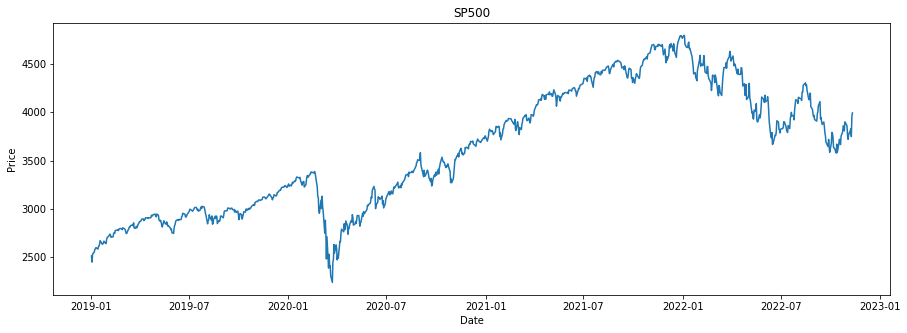

In [ ]:
#Plotting SP500
plt.figure(figsize = (15,5))
plt.plot(sp500)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SP500')
plt.show()

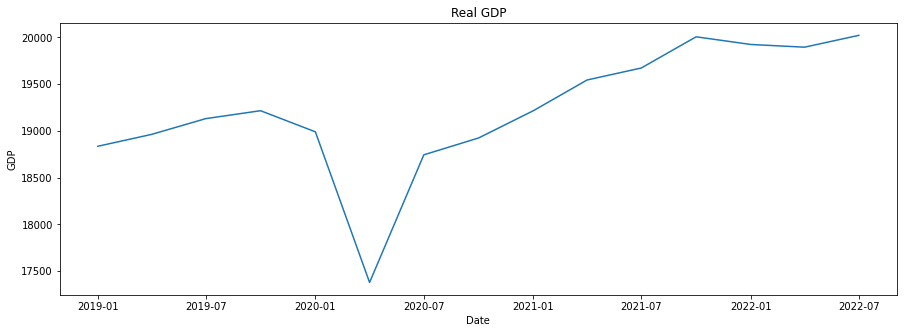

In [ ]:
#PLotting Real GDP
plt.figure(figsize = (15,5))
plt.plot(RGDP)
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('Real GDP')
plt.show()

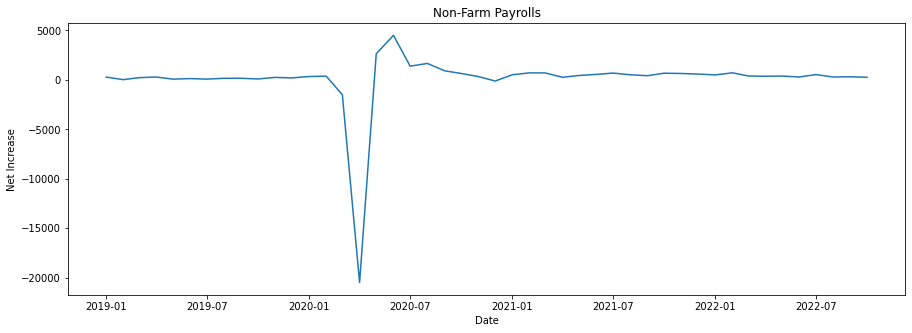

In [ ]:
#PLotting Non-Farm Payrolls
plt.figure(figsize = (15,5))
plt.plot(nonfarm)
plt.xlabel('Date')
plt.ylabel('Net Increase')
plt.title('Non-Farm Payrolls')
plt.show()

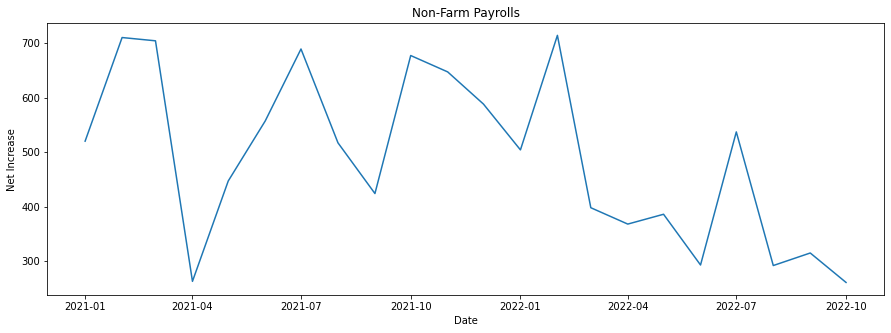

In [ ]:
#units are hard to see because of the 20 million jobs lost during the pandemic
#I will look at data from 2021 forward to get a better look at the non-farm payrolls
nonfarm2 = fred.get_series(series_id = 'PAYEMS', observation_start = '01/01/2021', units = 'chg')

#Plotting new non-farm data set
plt.figure(figsize = (15,5))
plt.plot(nonfarm2)
plt.xlabel('Date')
plt.ylabel('Net Increase')
plt.title('Non-Farm Payrolls')
plt.show()

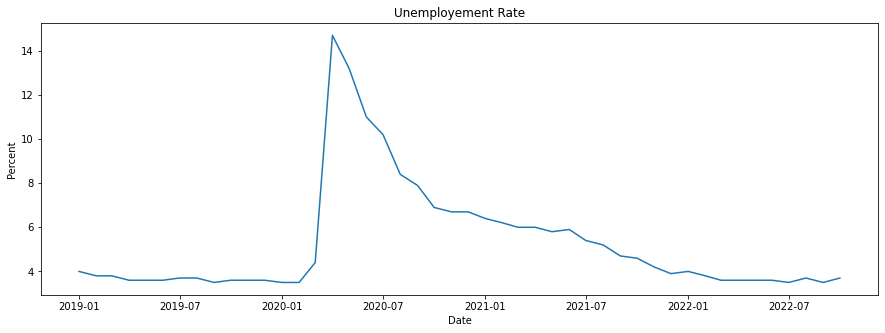

In [ ]:
#Plotting Unemployement Rate
plt.figure(figsize = (15,5))
plt.plot(unrate)
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Unemployement Rate')
plt.show()

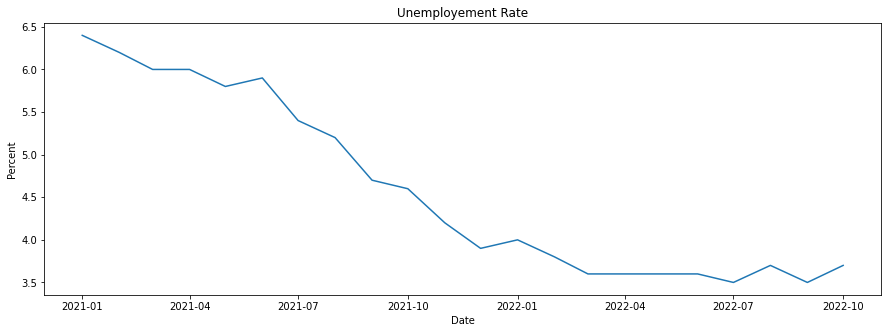

In [ ]:
# again theunemployement rate of 14% makes the other data points look small.
# I will look at the unemployement rate from 2021 onward to get a better look at the data
unrate2 = fred.get_series(series_id = 'UNRATE', observation_start = '01/01/2021')

#plotting the new unemployement rate 
plt.figure(figsize = (15,5))
plt.plot(unrate2)
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Unemployement Rate')
plt.show()

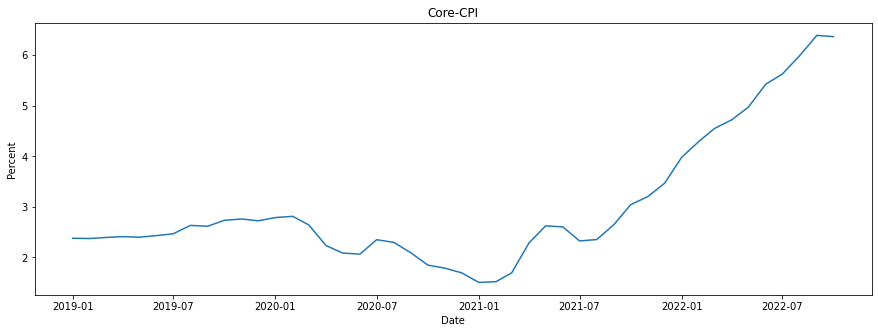

In [ ]:
#Plotting Core CPI
plt.figure(figsize = (15,5))
plt.plot(Core_CPI)
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Core-CPI')
plt.show()

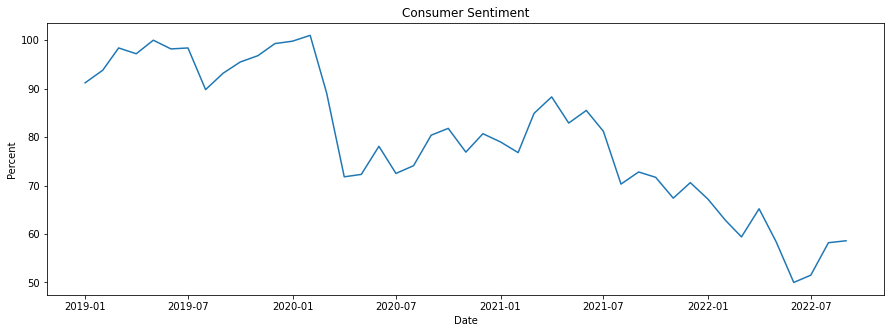

In [ ]:
#Plotting Consumer Sentiment
plt.figure(figsize = (15,5))
plt.plot(consumersentiment)
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Consumer Sentiment')
plt.show()

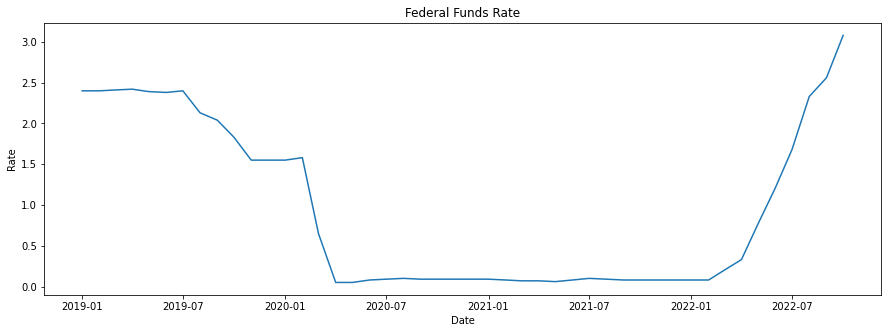

In [ ]:
#Plotting Federeal Funds Rate
plt.figure(figsize = (15,5))
plt.plot(ffr)
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Federal Funds Rate')
plt.show()

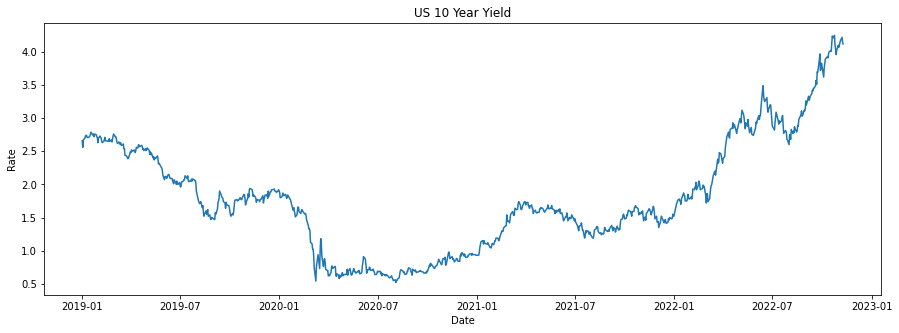

In [ ]:
#Plotting Us 10 year yield
plt.figure(figsize = (15,5))
plt.plot(US10Y)
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('US 10 Year Yield')
plt.show()

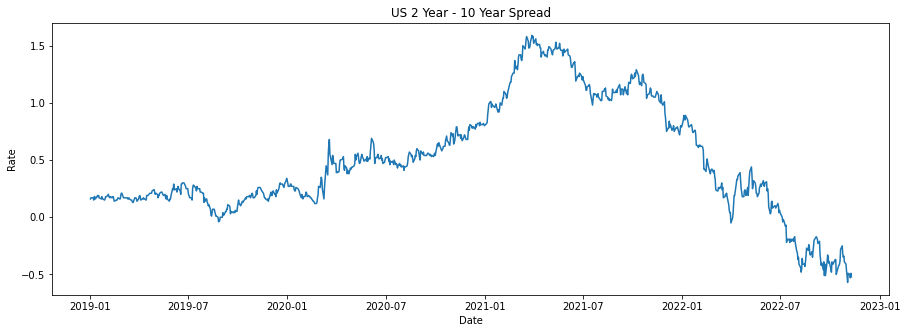

In [ ]:
#Plotting US 2/10 year spread
plt.figure(figsize = (15,5))
plt.plot(yr2_10)
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('US 2 Year - 10 Year Spread')
plt.show()

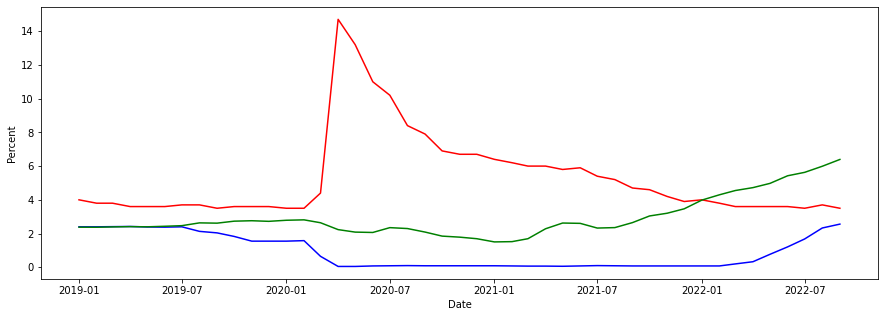

In [ ]:
# Comparing Federal Funds Rate, Unemployement Rate and Core CPI
plt.figure(figsize = (15,5))
plt.plot(combine4['Federal Funds Rate'], color = 'blue')
plt.plot(combine4['Unemployement Rate'], color = 'red')
plt.plot(combine4['Core CPI'], color = 'green')

plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

References
https://www.datasciencelearner.com/pandas-dropna-remove-nan-rows-python/#:~:text=Steps%20to%20Remove%20NaN%20from%20Dataframe%20using%20pandas,Remove%20the%20NaN%20values%20using%20dropna%20%28%29%20method


https://www.youtube.com/watch?v=R67XuYc9NQ4&t=2097s